## https://archive.ics.uci.edu/ml/datasets/Breast+Tissue

# Breast Tissue

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly as py
%matplotlib inline
import cufflinks as cf
from scipy import stats
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df_o = pd.read_excel(r'C:\Users\sshar127\Desktop\Python\Breast Tissue\BreastTissue.xls', sheet_name = 'Data')

In [4]:
df_o.head()

,Case #,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [5]:
df = df_o.copy()

In [6]:
df.drop('Case #', axis = 1, inplace = True)

In [7]:
df.head()

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [8]:
df.isna().sum()

Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A/DA      0
Max IP    0
DR        0
P         0
dtype: int64

In [9]:
df.describe()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


In [10]:
corr = df.corr()

In [11]:
corr

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
I0,1.000000,-0.393647,0.028455,0.819606,0.560098,0.612070,0.823668,0.733252,0.988697
PA500,-0.393647,1.000000,0.509019,-0.089817,0.083547,0.229837,-0.050401,-0.077054,-0.345715
HFS,0.028455,0.509019,1.000000,0.106977,0.206059,0.356028,0.370827,0.011592,0.102362
DA,0.819606,-0.089817,0.106977,1.000000,0.731132,0.648334,0.753227,0.974202,0.774028
Area,0.560098,0.083547,0.206059,0.731132,1.000000,0.830172,0.735258,0.675810,0.574073
A/DA,0.612070,0.229837,0.356028,0.648334,0.830172,1.000000,0.812815,0.540695,0.679363
Max IP,0.823668,-0.050401,0.370827,0.753227,0.735258,0.812815,1.000000,0.600290,0.861837
DR,0.733252,-0.077054,0.011592,0.974202,0.675810,0.540695,0.600290,1.000000,0.665987
P,0.988697,-0.345715,0.102362,0.774028,0.574073,0.679363,0.861837,0.665987,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   106 non-null    object 
 1   I0      106 non-null    float64
 2   PA500   106 non-null    float64
 3   HFS     106 non-null    float64
 4   DA      106 non-null    float64
 5   Area    106 non-null    float64
 6   A/DA    106 non-null    float64
 7   Max IP  106 non-null    float64
 8   DR      106 non-null    float64
 9   P       106 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.4+ KB


In [13]:
df.columns

Index(['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR',
       'P'],
      dtype='object')

In [14]:
class_grp = df.groupby('Class')

In [15]:
df.Class.value_counts()

adi    22
car    21
mas    18
gla    16
fad    15
con    14
Name: Class, dtype: int64

In [16]:
class_grp.get_group('adi').mean()

I0         2052.050322
PA500         0.073552
HFS           0.134373
DA          396.997232
Area      24889.742849
A/DA         50.775814
Max IP      194.597255
DR          324.714715
P          2138.753679
dtype: float64

In [17]:
class_grp.get_group('car').mean()

I0         394.232013
PA500        0.219853
HFS          0.184340
DA         168.271163
Area      5723.121373
A/DA        32.046327
Max IP      64.531520
DR         153.007986
P          479.972602
dtype: float64

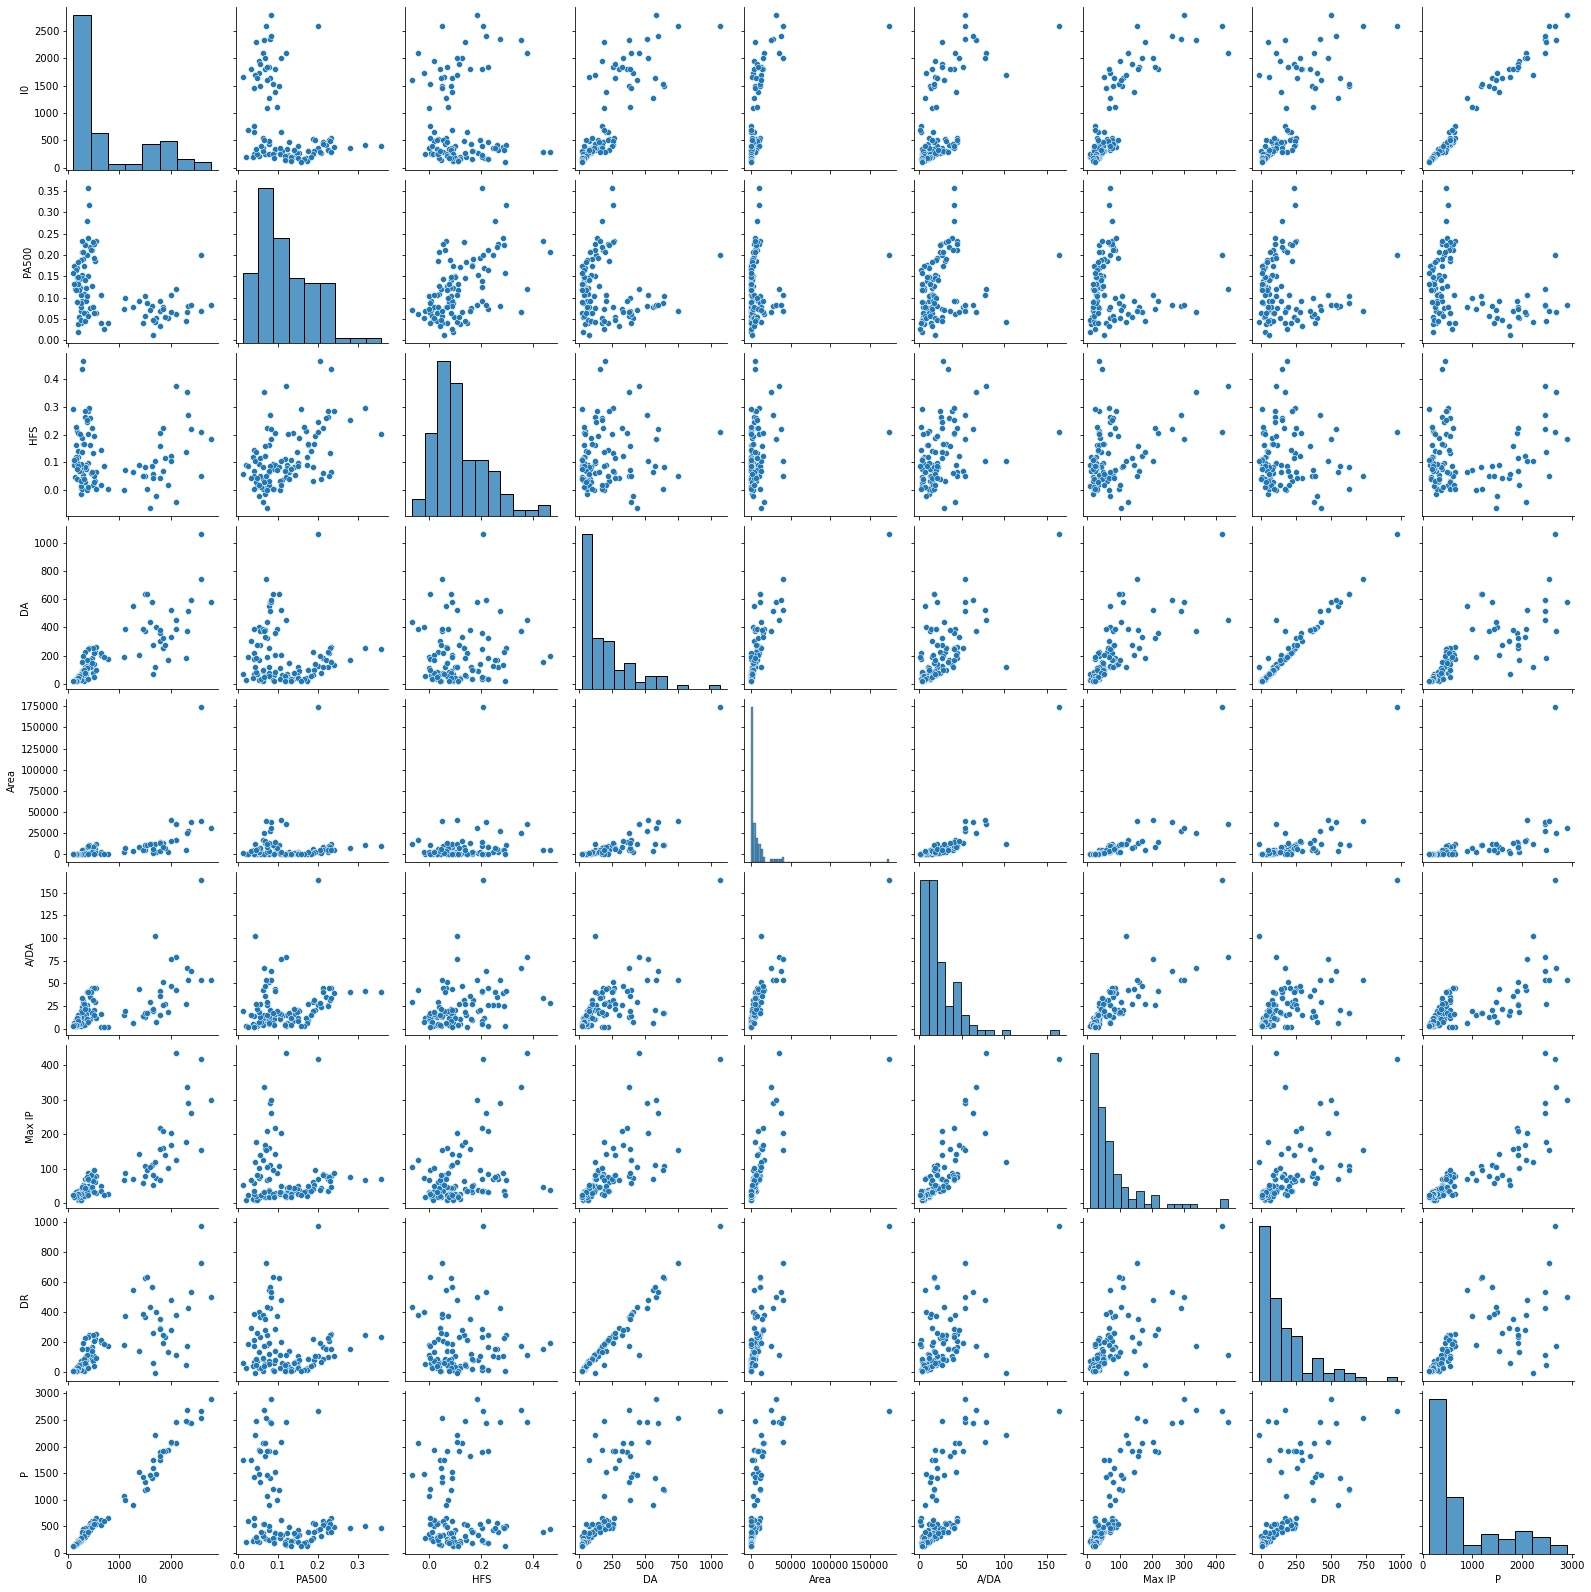

In [18]:
sns.pairplot(data = df)
plt.show()

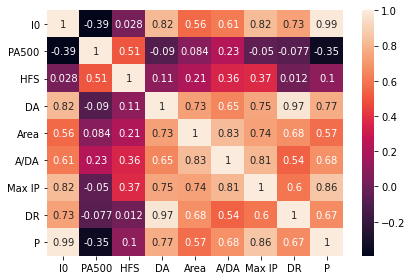

In [19]:
sns.heatmap(corr, annot = True)
plt.tight_layout()
plt.show()

In [20]:
df.iplot()

<AxesSubplot:>

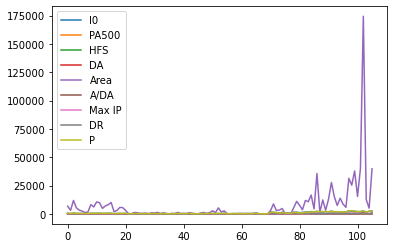

In [21]:
df.plot()

In [22]:
df.head()

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [23]:
df.iplot(kind = 'bar', x = 'Class', y = 'I0', z = 'Area')

<AxesSubplot:>

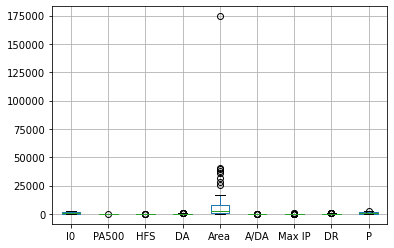

In [24]:
df.boxplot()

In [25]:
df.iplot(kind = 'box')

In [26]:
df1 = pd.get_dummies(df, columns = ['Class'], drop_first = True)
df1.head()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,Class_car,Class_con,Class_fad,Class_gla,Class_mas
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334,1,0,0,0,0
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776,1,0,0,0,0
2,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449,1,0,0,0,0
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814,1,0,0,0,0
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,1,0,0,0,0


In [27]:
z_score = np.abs(stats.zscore(df1))

In [28]:
z_score

array([[0.34576577, 0.98599576, 0.81866399, ..., 0.40599897, 0.42163702,
        0.45226702],
       [0.60535785, 1.56375157, 1.49303791, ..., 0.40599897, 0.42163702,
        0.45226702],
       [0.30967069, 1.64555771, 0.50720715, ..., 0.40599897, 0.42163702,
        0.45226702],
       ...,
       [1.08710606, 0.70636862, 1.7945621 , ..., 0.40599897, 0.42163702,
        0.45226702],
       [2.01996018, 1.10006064, 0.21952549, ..., 0.40599897, 0.42163702,
        0.45226702],
       [2.4197548 , 0.73448948, 0.65255367, ..., 0.40599897, 0.42163702,
        0.45226702]])

In [29]:
z_score.mean()

0.7319107813174295

In [30]:
print (np.where (z_score > 3))

(array([ 15,  19,  52,  86,  88,  98, 102, 102, 102, 102, 102, 105],
      dtype=int64), array([1, 2, 2, 6, 5, 6, 3, 4, 5, 6, 7, 7], dtype=int64))


In [31]:
df1 = df1[(z_score < 3).all(axis = 1)]

In [32]:
df.shape

(106, 10)

In [33]:
df1.shape

(98, 14)

In [34]:
df1.iplot(kind = 'surface')

<AxesSubplot:>

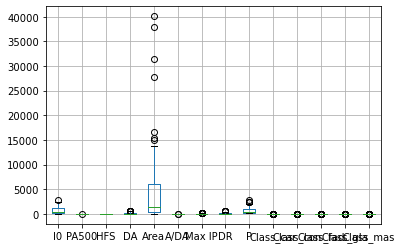

In [35]:
df1.boxplot()

<AxesSubplot:xlabel='Class', ylabel='I0'>

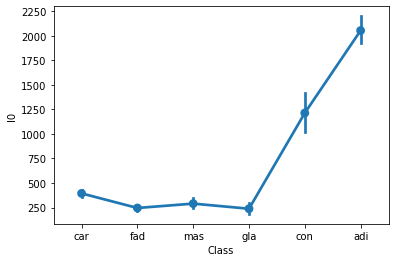

In [36]:
plt.subplot()
sns.pointplot(x = df['Class'], y = df['I0'])

In [37]:
px.scatter(df, x = df['Class'], y = df['I0'])

In [38]:
df.Class.value_counts()

adi    22
car    21
mas    18
gla    16
fad    15
con    14
Name: Class, dtype: int64

In [39]:
df1.head()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,Class_car,Class_con,Class_fad,Class_gla,Class_mas
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334,1,0,0,0,0
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776,1,0,0,0,0
2,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449,1,0,0,0,0
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814,1,0,0,0,0
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,1,0,0,0,0


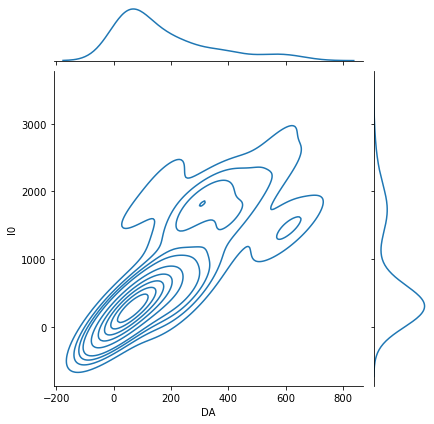

In [40]:
sns.jointplot(x = df1['DA'], y = df1['I0'], kind = 'kde')
plt.show()

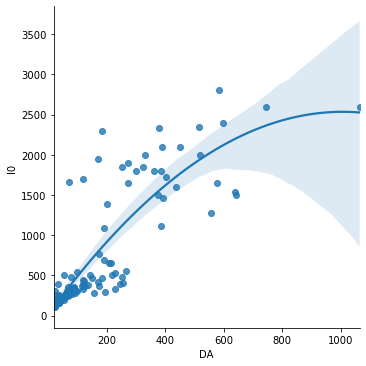

In [41]:
sns.lmplot(x = 'DA', y = 'I0', data = df, order = 2)

### Data Except Class

In [42]:
data1 = list(df.columns[1:])

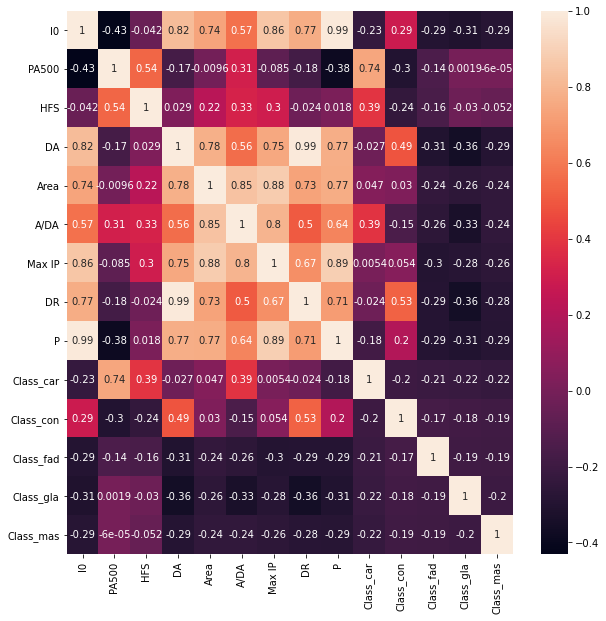

In [43]:
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(), annot = True)
plt.show()

<AxesSubplot:ylabel='Class'>

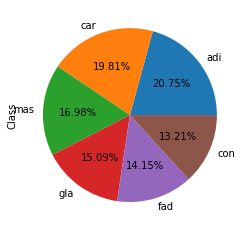

In [44]:
df['Class'].value_counts().plot.pie(autopct='%.2f%%')

In [45]:
print (df.columns)
print (df1.columns)

Index(['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR',
       'P'],
      dtype='object')
Index(['I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR', 'P',
       'Class_car', 'Class_con', 'Class_fad', 'Class_gla', 'Class_mas'],
      dtype='object')


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
I0,106.0,784.251618,753.950075,103.000000,250.000000,384.936489,1487.989626,2800.000000
PA500,106.0,0.120133,0.068596,0.012392,0.067413,0.105418,0.169602,0.358316
HFS,106.0,0.114691,0.101347,-0.066323,0.043982,0.086568,0.166504,0.467748
DA,106.0,190.568642,190.801448,19.647670,53.845470,120.777303,255.334809,1063.441427
Area,106.0,7335.155162,18580.314213,70.426239,409.647141,2219.581163,7615.204968,174480.476218
A/DA,106.0,23.473784,23.354672,1.595742,8.180321,16.133657,30.953294,164.071543
Max IP,106.0,75.381258,81.345838,7.968783,26.893773,44.216040,83.671755,436.099640
DR,106.0,166.710575,181.309580,-9.257696,41.781258,97.832557,232.990070,977.552367
P,106.0,810.638127,763.019135,124.978561,270.215238,454.108153,1301.559438,2896.582483


In [47]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
I0,98.0,722.806462,696.941076,103.000000,246.250000,368.669052,1230.953555,2800.000000
PA500,98.0,0.116678,0.064088,0.012392,0.067413,0.104283,0.157080,0.317824
HFS,98.0,0.101581,0.084063,-0.066323,0.040492,0.084474,0.154113,0.297404
DA,98.0,171.882254,163.941243,19.647670,49.648205,99.649021,247.520057,640.275950
Area,98.0,4784.961548,7495.174666,70.426239,367.293098,1386.534866,6037.303520,40087.920984
A/DA,98.0,19.582755,15.555869,1.595742,7.447150,15.503590,27.216579,77.059161
Max IP,98.0,65.016903,60.730928,7.968783,25.976145,41.500847,78.903757,298.582977
DR,98.0,154.182247,158.037363,5.720501,41.089592,87.098871,225.632898,632.165115
P,98.0,735.057315,684.907254,124.978561,255.272701,427.091146,1045.822599,2896.582483
Class_car,98.0,0.193878,0.397367,0.000000,0.000000,0.000000,0.000000,1.000000


In [48]:
df1.head()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,Class_car,Class_con,Class_fad,Class_gla,Class_mas
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334,1,0,0,0,0
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776,1,0,0,0,0
2,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449,1,0,0,0,0
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814,1,0,0,0,0
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,1,0,0,0,0


In [49]:
X = df1.iloc[:,:9]
y1 = df1.loc[:, 'Class_car']
y2 = df1.loc[:, 'Class_con']
y3 = df1.loc[:, 'Class_fad']
y4 = df1.loc[:, 'Class_gla']
y5 = df1.loc[:, 'Class_mas']

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### On Y1

In [51]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y1, test_size = 0.2, random_state = None)

#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
y1_rfc = RandomForestClassifier()
y1_rfc.fit(X_train1, y_train1)

RandomForestClassifier()

In [53]:
y1_rfc_pred = y1_rfc.predict(X_test1)

In [54]:
print (confusion_matrix(y_test1, y1_rfc_pred))

[[16  0]
 [ 1  3]]


In [55]:
print (accuracy_score(y_test1, y1_rfc_pred))

0.95


#### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
y1_dtc = DecisionTreeClassifier()
y1_dtc.fit(X_train1, y_train1)
y1_dtc_pred = y1_dtc.predict(X_test1)

In [57]:
print ('Confusion Matrix: ', confusion_matrix(y_test1, y1_dtc_pred))
print ('Accuracy Score: ', accuracy_score(y_test1, y1_dtc_pred))

Confusion Matrix:  [[16  0]
 [ 1  3]]
Accuracy Score:  0.95


[Text(167.4, 195.696, 'X[1] <= 1.143\ngini = 0.311\nsamples = 78\nvalue = [63, 15]'),
 Text(111.60000000000001, 152.208, 'X[1] <= 0.406\ngini = 0.087\nsamples = 66\nvalue = [63, 3]'),
 Text(55.800000000000004, 108.72, 'gini = 0.0\nsamples = 54\nvalue = [54, 0]'),
 Text(167.4, 108.72, 'X[0] <= -0.635\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(111.60000000000001, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(223.20000000000002, 65.232, 'X[2] <= 0.359\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(279.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 152.208, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

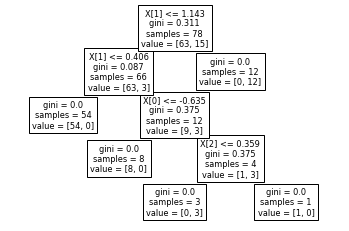

In [58]:
tree.plot_tree(y1_dtc) 

#### XG Boost

In [59]:
from xgboost import XGBClassifier
y1_xgb = XGBClassifier()
y1_xgb.fit(X_train1, y_train1)
y1_xgb_pred = y1_xgb.predict(X_test1)

[12:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
print ('Confusion Matrix: ', confusion_matrix(y_test1, y1_xgb_pred))
print ('Accuracy Score: ', accuracy_score(y_test1, y1_xgb_pred))

Confusion Matrix:  [[16  0]
 [ 1  3]]
Accuracy Score:  0.95


#### Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
y1_gnb = GaussianNB()
y1_gnb.fit(X_train1, y_train1)
y1_gnb_pred = y1_gnb.predict(X_test1)

In [62]:
print ('Confusion Matrix: ', confusion_matrix(y_test1, y1_gnb_pred))
print ('Accuracy Score: ', accuracy_score(y_test1, y1_gnb_pred))

Confusion Matrix:  [[15  1]
 [ 1  3]]
Accuracy Score:  0.9


#### SVM

In [63]:
from sklearn.svm import SVC
y1_svc = SVC()
y1_svc.fit(X_train1, y_train1)
y1_svc_pred = y1_svc.predict(X_test1)

In [64]:
print ('Confusion Matrix: ', confusion_matrix(y_test1, y1_svc_pred))
print ('Accuracy Score: ', accuracy_score(y_test1, y1_svc_pred))

Confusion Matrix:  [[16  0]
 [ 2  2]]
Accuracy Score:  0.9


### On Y2

In [65]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y2, test_size = 0.2, random_state = None)

#### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
y2_rfc = RandomForestClassifier()
y2_rfc.fit(X_train2, y_train2)
y2_rfc_pred = y2_rfc.predict(X_test2)

In [67]:
print ('Confusion Matrix: ', confusion_matrix(y_test2, y2_rfc_pred))
print ('Accuracy Score: ', accuracy_score(y_test2, y2_rfc_pred))

Confusion Matrix:  [[15  0]
 [ 2  3]]
Accuracy Score:  0.9


#### Decision Tree

In [68]:
y2_dtc = DecisionTreeClassifier()
y2_dtc.fit(X_train2, y_train2)
y2_dtc_pred = y2_dtc.predict(X_test2)

In [69]:
print ('Confusion Matrix: ', confusion_matrix(y_test2, y2_dtc_pred))
print ('Accuracy Score: ', accuracy_score(y_test2, y2_dtc_pred))

Confusion Matrix:  [[15  0]
 [ 0  5]]
Accuracy Score:  1.0


[Text(133.92000000000002, 190.26, 'X[0] <= -0.176\ngini = 0.204\nsamples = 78\nvalue = [69, 9]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 56\nvalue = [56, 0]'),
 Text(200.88000000000002, 135.9, 'X[8] <= 1.216\ngini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(133.92000000000002, 81.53999999999999, 'X[4] <= 1.002\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')]

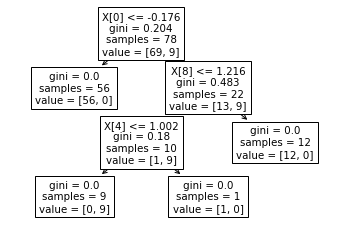

In [70]:
tree.plot_tree(y2_dtc) 

#### XGBoost

In [71]:
y2_xgb = XGBClassifier()
y2_xgb.fit(X_train2, y_train2)
y2_xgb_pred = y2_xgb.predict(X_test2)

[12:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
print ('Confusion Matrix: ', confusion_matrix(y_test2, y2_xgb_pred))
print ('Accuracy Score: ', accuracy_score(y_test2, y2_xgb_pred))

Confusion Matrix:  [[15  0]
 [ 1  4]]
Accuracy Score:  0.95


#### Naive Bayes

In [73]:
y2_gnb = GaussianNB()
y2_gnb.fit(X_train2, y_train2)
y2_gnb_pred = y2_gnb.predict(X_test2)

In [74]:
print ('Confusion Matrix: ', confusion_matrix(y_test2, y2_gnb_pred))
print ('Accuracy Score: ', accuracy_score(y_test2, y2_gnb_pred))

Confusion Matrix:  [[14  1]
 [ 1  4]]
Accuracy Score:  0.9


#### SVM

In [75]:
y2_svc = SVC()
y2_svc.fit(X_train2, y_train2)
y2_svc_pred = y2_svc.predict(X_test2)

In [76]:
print ('Confusion Matrix: ', confusion_matrix(y_test2, y2_svc_pred))
print ('Accuracy Score: ', accuracy_score(y_test2, y2_svc_pred))

Confusion Matrix:  [[15  0]
 [ 1  4]]
Accuracy Score:  0.95
